# Compare tau decay distributions between Tauola and IceCube simulations

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyhepmc
from collections import Counter

## Load events from IceCube

In [3]:
particle_info = pd.read_csv('genie_tau_decays_particles.csv')

In [69]:
with pyhepmc.open("tauola_output.dat", "r") as f:
    evt = f.read()
    evt2 = f.read()
    evt3 = f.read()

In [9]:
evt

<GenEvent momentum_unit=1, length_unit=0, event_number=0, particles=5, vertices=2, run_info=GenRunInfo(tools=[], weight_names=[], attributes={})>

In [10]:
evt2

<GenEvent momentum_unit=1, length_unit=0, event_number=1, particles=7, vertices=3, run_info=GenRunInfo(tools=[], weight_names=[], attributes={})>

In [70]:
evt3

<GenEvent momentum_unit=1, length_unit=0, event_number=2, particles=5, vertices=2, run_info=GenRunInfo(tools=[], weight_names=[], attributes={})>

In [79]:
# nutau_e = []
# anti_nutau_e = []
decay_products = []
with pyhepmc.open("tauola_output.dat", "r") as f:
    # Iterate over all events
    for i, evt in enumerate(f):
        # Find the tau and identify its daughter tau neutrino
        for vertex in evt.vertices:
            # Check if there is a tau neutrino as incoming particle
            # If it is, skip the vertex
            if any(np.abs(p.pid) == 16 for p in vertex.particles_in):
                continue
            
            event_number = evt.event_number

            # Find the daughter tau neutrino
            for daughter in vertex.particles_out:
                # If it is not a final state particle, skip it
                if daughter.status != 1:
                    continue

                decay_products.append(
                    [
                        event_number,
                        daughter.pid,
                        daughter.momentum.e,
                        daughter.momentum.px,
                        daughter.momentum.py,
                        daughter.momentum.pz
                    ]
                )
        
        if i % 10_000 == 0:
            print(i)

decay_products = pd.DataFrame(decay_products, columns=['event_num', 'pdg', 'E', 'px', 'py', 'pz'])

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000


In [78]:
# nutau_e = []
# anti_nutau_e = []
decay_products = []
with pyhepmc.open("tauola_output.dat", "r") as f:
    # Iterate over all events
    for i, evt in enumerate(f):
        # Find the tau and identify its daughter tau neutrino
        for vertex in evt.vertices:
            # If this is the first vertex, skip
            if any(np.abs(p.pid) == 16 for p in vertex.particles_in):
                continue
            print(vertex)
            # Check if the incoming particle of the vertex is a tau
            # If it is, then all outgoing particles are the decay products of the tau
            for particle in vertex.particles_out:
                print(particle)
        print()
        if i > 2:
            break

GenVertex(FourVector(-0.000264, 0.0257, 0.0156, 0.0359))
GenParticle(FourVector(-0.314, 0.493, -0.355, 0.684), mass=0.00999338, pid=-16, status=1)
GenParticle(FourVector(0.29, 1.84, 1.77, 2.57), mass=0.139568, pid=211, status=1)

GenVertex(FourVector(-0.0109, -0.0193, 0.0183, 0.0368))
GenParticle(FourVector(-0.346, -0.593, -0.247, 0.73), mass=0.0100023, pid=16, status=1)
GenParticle(FourVector(-0.499, -0.898, 1.66, 2.12), mass=0.811167, pid=-213, status=2)
GenVertex(FourVector(-0.0109, -0.0193, 0.0183, 0.0368))
GenParticle(FourVector(-0.107, -0.832, 0.855, 1.21), mass=0.139568, pid=-211, status=1)
GenParticle(FourVector(-0.392, -0.0663, 0.808, 0.911), mass=0.134964, pid=111, status=1)

GenVertex(FourVector(-0.105, -0.0859, -0.0315, 0.165))
GenParticle(FourVector(-0.873, -0.794, 0.605, 1.33), mass=0.0099889, pid=16, status=1)
GenParticle(FourVector(-1.25, -0.943, -1.24, 2.01), mass=0.139568, pid=-211, status=1)

GenVertex(FourVector(-0.00665, -0.0984, -0.603, 0.708))
GenParticle(FourVec

In [81]:
decay_products.head(10)

,event_num,pdg,E,px,py,pz
0,0,-16,0.684091,-0.313670,0.493112,-0.355432
1,0,211,2.567605,0.289773,1.836672,1.765158
2,1,16,0.729982,-0.346327,-0.593313,-0.246598
3,1,-211,1.205996,-0.106781,-0.831778,0.855389
4,1,111,0.910825,-0.392252,-0.066269,0.808167
5,2,16,1.326160,-0.872639,-0.794149,0.605334
6,2,-211,2.006558,-1.254764,-0.943051,-1.242184
7,3,16,1.084733,-0.777681,-0.107588,-0.748454
8,3,11,1.066515,0.324618,0.035655,-1.015287
9,3,-12,1.358636,0.420127,-0.415703,-1.223346


## Energy of tau neutrino

In [82]:
decays_icecube = particle_info.groupby("event_num").nth[3:]
nutau_icecube_e = decays_icecube.query("pdg == 16")["E"]
anti_nutau_icecube_e = decays_icecube.query("pdg == -16")["E"]
nutau_e = decay_products.query("pdg == 16")["E"]
anti_nutau_e = decay_products.query("pdg == -16")["E"]

In [83]:
assert len(nutau_e) == len(nutau_icecube_e)
assert len(anti_nutau_e) == len(anti_nutau_icecube_e)

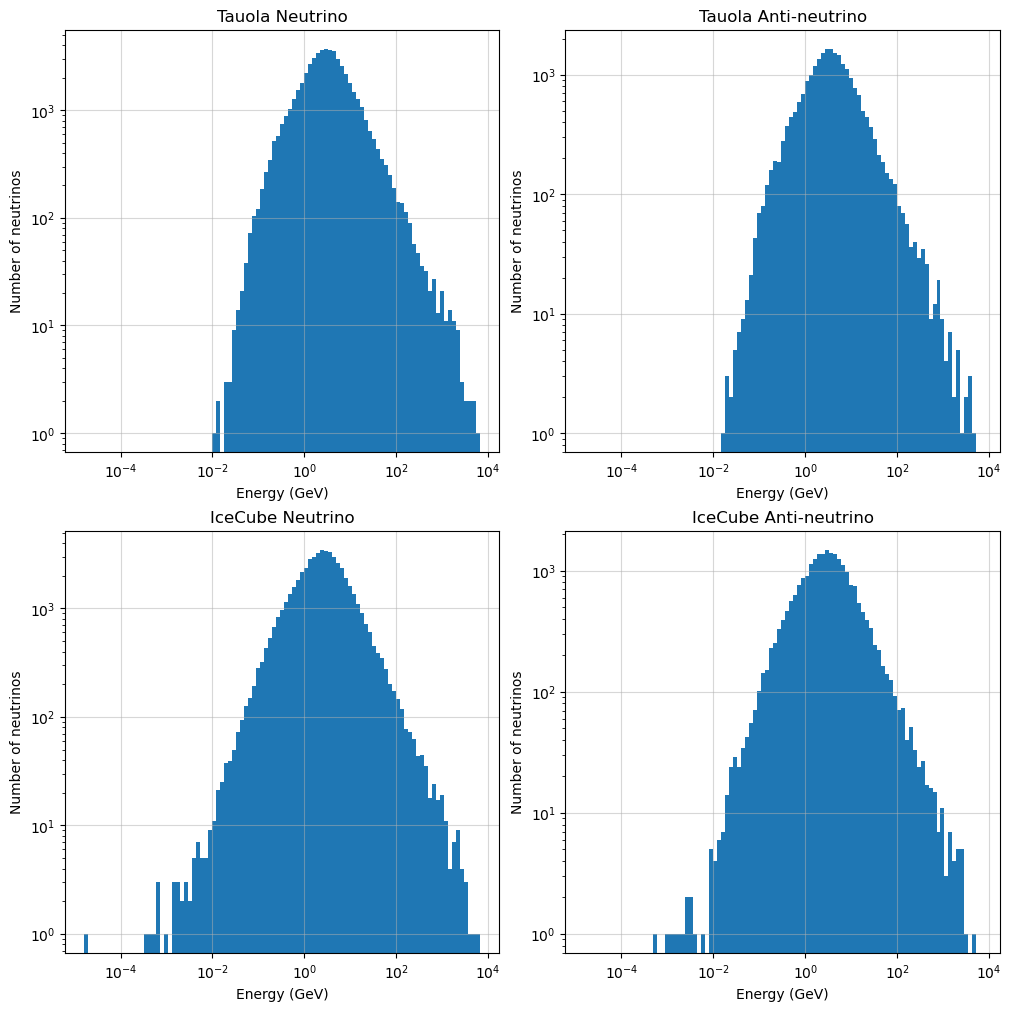

In [84]:
fig, axs = plt.subplots(figsize=(10, 10), nrows=2, ncols=2, layout="constrained")

min_energy = np.min(np.r_[nutau_e, anti_nutau_e, nutau_icecube_e, anti_nutau_icecube_e])
max_energy = np.max(np.r_[nutau_e, anti_nutau_e, nutau_icecube_e, anti_nutau_icecube_e])

for ax_row, label, lists, in zip(axs, ("Tauola", "IceCube"), ((nutau_e, anti_nutau_e), (nutau_icecube_e, anti_nutau_icecube_e))):
    for ax, energies, particle_type in zip(ax_row, lists, ("Neutrino", "Anti-neutrino")):
        ax.hist(energies, bins=np.geomspace(min_energy, max_energy, 100), label=f"{label} {particle_type}")
        ax.set_title(f"{label} {particle_type}")
        
for ax in axs.flat:
    ax.set(xscale="log", yscale="log", xlabel="Energy (GeV)", ylabel="Number of neutrinos")
    ax.grid(True, alpha=0.5)
    # ax.legend(fontsize="large")

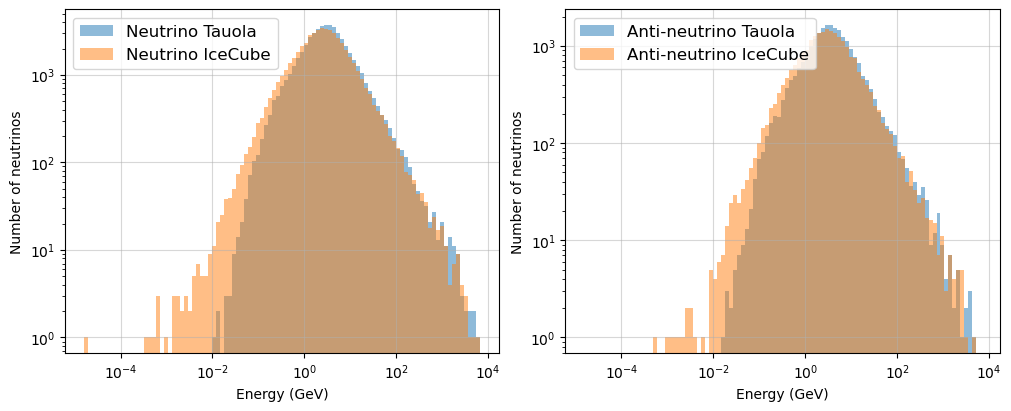

In [85]:
fig, axs = plt.subplots(figsize=(10, 4), nrows=1, ncols=2, layout="constrained")

min_energy = np.min(np.r_[nutau_e, anti_nutau_e, nutau_icecube_e, anti_nutau_icecube_e])
max_energy = np.max(np.r_[nutau_e, anti_nutau_e, nutau_icecube_e, anti_nutau_icecube_e])

for ax, label, lists, in zip(axs, ("Neutrino", "Anti-neutrino"), ((nutau_e, nutau_icecube_e), (anti_nutau_e, anti_nutau_icecube_e))):
    for energies, particle_type in zip(lists, ("Tauola", "IceCube")):
        ax.hist(energies, bins=np.geomspace(min_energy, max_energy, 100), label=f"{label} {particle_type}", alpha=0.5)
        # ax.set_title(f"{label} {particle_type}")
        
for ax in axs.flat:
    ax.set(xscale="log", yscale="log", xlabel="Energy (GeV)", ylabel="Number of neutrinos")
    ax.grid(True, alpha=0.5)
    ax.legend(fontsize="large")

It seems like neutrinos tend to have lower energies for IceCube compared to Tauola. This would mean that the IceCube simulations overestimate the energy deposited in the detector.

## Low energy incoming tau neutrinos

In [89]:
# Select only events where the incoming neutrino has energy < 50 GeV
low_energy_events = particle_info.groupby("event_num").filter(lambda df: df.iloc[1, 2] < 10)

In [90]:
decays_icecube_low_energy = decays_icecube[decays_icecube["event_num"].isin(low_energy_events["event_num"])]
nutau_icecube_e_le = decays_icecube_low_energy.query("pdg == 16")["E"]
anti_nutau_icecube_e_le = decays_icecube_low_energy.query("pdg == -16")["E"]

decays_low_energy = decay_products[decay_products["event_num"].isin(low_energy_events["event_num"])]
nutau_e_le = decays_low_energy.query("pdg == 16")["E"]
anti_nutau_e_le = decays_low_energy.query("pdg == -16")["E"]

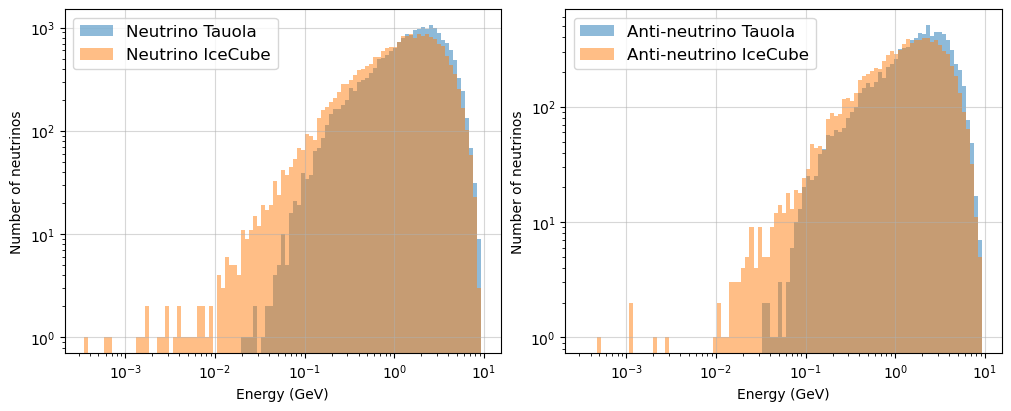

In [91]:
fig, axs = plt.subplots(figsize=(10, 4), nrows=1, ncols=2, layout="constrained")

min_energy = np.min(np.r_[nutau_e_le, anti_nutau_e_le, nutau_icecube_e_le, anti_nutau_icecube_e_le])
max_energy = np.max(np.r_[nutau_e_le, anti_nutau_e_le, nutau_icecube_e_le, anti_nutau_icecube_e_le])

for ax, label, lists, in zip(axs, ("Neutrino", "Anti-neutrino"), ((nutau_e_le, nutau_icecube_e_le), (anti_nutau_e_le, anti_nutau_icecube_e_le))):
    for energies, particle_type in zip(lists, ("Tauola", "IceCube")):
        ax.hist(energies, bins=np.geomspace(min_energy, max_energy, 100), label=f"{label} {particle_type}", alpha=0.5)
        # ax.set_title(f"{label} {particle_type}")
        
for ax in axs.flat:
    ax.set(xscale="log", yscale="log", xlabel="Energy (GeV)", ylabel="Number of neutrinos")
    ax.grid(True, alpha=0.5)
    ax.legend(fontsize="large")

## Branching ratios

In [96]:
c = Counter(tuple(sorted(a.tolist())) for i, a in decay_products.groupby("event_num")["pdg"])

In [97]:
n_taus = (particle_info["pdg"] == 15).sum()
n_anti_taus = (particle_info["pdg"] == -15).sum()
n_taus, n_anti_taus

(53172, 23471)

In [99]:
br = {}
for pdgs, n in c.items():
    if 16 in pdgs:
        br[pdgs] = n / n_taus
    elif -16 in pdgs:
        br[pdgs] = n / n_anti_taus
    else:
        raise ValueError("No tau in the event")
br

{(-16, 211): 0.11000809509607601,
 (-211, 16, 111): 0.24992477243662078,
 (-211, 16): 0.1117505453998345,
 (-12, 11, 16): 0.1562288422477996,
 (-211, -211, 16, 211): 0.08920108327691266,
 (-16, 111, 211): 0.2545694687060628,
 (-211, -16, 211, 211): 0.08418899919049039,
 (-14, 13, 16): 0.17065372752576544,
 (-211, 16, 111, 111): 0.09294365455502897,
 (-16, -11, 12): 0.15593711388522005,
 (-211, -211, 16, 111, 211): 0.04500488979161965,
 (-16, -11, 12, 22): 0.028801499723062503,
 (-211, 16, 310): 0.0042315504400812455,
 (-16, -13, 14): 0.17148821950492096,
 (-211, 16, 130): 0.004269164221770857,
 (-211, -16, 111, 211, 211): 0.045630778407396363,
 (-211, 16, 130, 130): 0.00028210336267208303,
 (-16, 111, 111, 211): 0.09100592220186614,
 (-321, 16, 111): 0.004476040021063717,
 (-12, 11, 16, 22): 0.026724591890468666,
 (-211, 16, 111, 310): 0.003046716316858497,
 (-321, -211, 16, 211): 0.005134281200631911,
 (-321, -211, 16, 321): 0.0014857443767396373,
 (-211, -211, 16, 111, 111, 111, 211)

In [101]:
pdg2name = {15: "tau-", 16: "nu_tau", 211: "pi+", -15: "tau+", -16: "nu_tau_bar", -211: "pi-", 111: "pi0", 13: "mu-", -13: "mu+", 14: "nu_mu", -14: "nu_mu_bar", 11: "e-", -11: "e+", 12: "nu_e", -12: "nu_e_bar", 22: "gamma"}

for pdgs, n in br.items():
    for pdg in pdgs:
        print(pdg2name[pdg], end=" ")
    print(":", n*100)

nu_tau_bar pi+ : 11.0008095096076
pi- nu_tau pi0 : 24.99247724366208
pi- nu_tau : 11.175054539983451
nu_e_bar e- nu_tau : 15.622884224779959
pi- pi- nu_tau pi+ : 8.920108327691265
nu_tau_bar pi0 pi+ : 25.456946870606277
pi- nu_tau_bar pi+ pi+ : 8.41889991904904
nu_mu_bar mu- nu_tau : 17.065372752576543
pi- nu_tau pi0 pi0 : 9.294365455502897
nu_tau_bar e+ nu_e : 15.593711388522005
pi- pi- nu_tau pi0 pi+ : 4.500488979161965
nu_tau_bar e+ nu_e gamma : 2.8801499723062505
pi- nu_tau 

KeyError: 310